<h1>KNN (Indonesia)<h1>

In [2]:
# Import library yang dipakai
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, precision_recall_fscore_support, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Masukkan dataset Slovakia dan Indonesia
## responses.csv = Slovakia
## responsesid.csv = Indonesia
## Jadi kalau mau memproses data, ganti namanya dari cadangan menjadi feat, dan satunya menjadi cadangan
cadangan = pd.read_csv('responses.csv')
df = pd.read_csv('responsesid.csv')
df = df.dropna()

# Ambil feature yang kita mau
featPred = df[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera","Smoking"]]

In [4]:
# Mengubah target dari kategorikal menjadi boolean (1 dan 2)
featPred[['Smoking']] = featPred[['Smoking']].replace({'never smoked': 0, 'tried smoking': 0, 'former smoker': 1, 'current smoker': 1})

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [5]:
featPred.corr(method='pearson')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Smoking
Music,1.000000,0.176978,0.453040,0.210119,0.192828,0.372210,0.347826,0.468897,0.201698,0.070504,0.106600,0.286097,0.205512,0.226278,0.203401,0.321668,0.168948,0.189994,0.259832,-0.021493
Slow songs or fast songs,0.176978,1.000000,0.105764,-0.102791,-0.106137,-0.092466,-0.188917,0.101261,0.251338,0.221261,0.238407,0.190566,-0.046807,0.102595,0.327257,0.146063,0.008920,0.160093,0.041460,0.069195
Dance,0.453040,0.105764,1.000000,0.186329,0.263382,0.228867,0.245285,0.230209,0.315338,0.147960,0.179206,0.472527,0.336176,0.281275,0.502438,0.475901,0.219096,0.383474,0.219037,0.064068
Folk,0.210119,-0.102791,0.186329,1.000000,0.339742,0.339495,0.312126,-0.201361,0.200282,0.088820,-0.023965,-0.117074,0.354690,0.224735,0.140169,0.028998,0.320982,-0.112052,0.446515,0.083691
Country,0.192828,-0.106137,0.263382,0.339742,1.000000,0.168932,0.207411,0.184169,0.086347,0.013684,0.181985,-0.059403,0.366806,0.170250,0.188820,0.397659,0.323685,0.031884,0.066036,0.010295
Classical music,0.372210,-0.092466,0.228867,0.339495,0.168932,1.000000,0.577476,0.073471,0.165358,0.078560,0.076206,-0.125732,0.190342,0.239167,0.112328,0.165434,0.119453,0.108892,0.358851,0.141182
Musical,0.347826,-0.188917,0.245285,0.312126,0.207411,0.577476,1.000000,0.182136,-0.027712,-0.015944,0.042857,0.018964,0.246248,0.420579,0.050161,0.230581,0.303990,-0.014218,0.439149,0.058529
Pop,0.468897,0.101261,0.230209,-0.201361,0.184169,0.073471,0.182136,1.000000,0.008883,-0.152449,0.049763,0.418684,0.056710,0.078375,-0.012618,0.322046,0.002804,0.314571,0.069713,0.008435
Rock,0.201698,0.251338,0.315338,0.200282,0.086347,0.165358,-0.027712,0.008883,1.000000,0.753082,0.568183,0.180396,0.293368,0.077411,0.788790,0.300648,0.152997,0.172658,-0.064958,0.247169
Metal or Hardrock,0.070504,0.221261,0.147960,0.088820,0.013684,0.078560,-0.015944,-0.152449,0.753082,1.000000,0.747442,0.106044,0.306729,0.097521,0.629123,0.245254,0.196827,0.200001,0.086146,0.211339


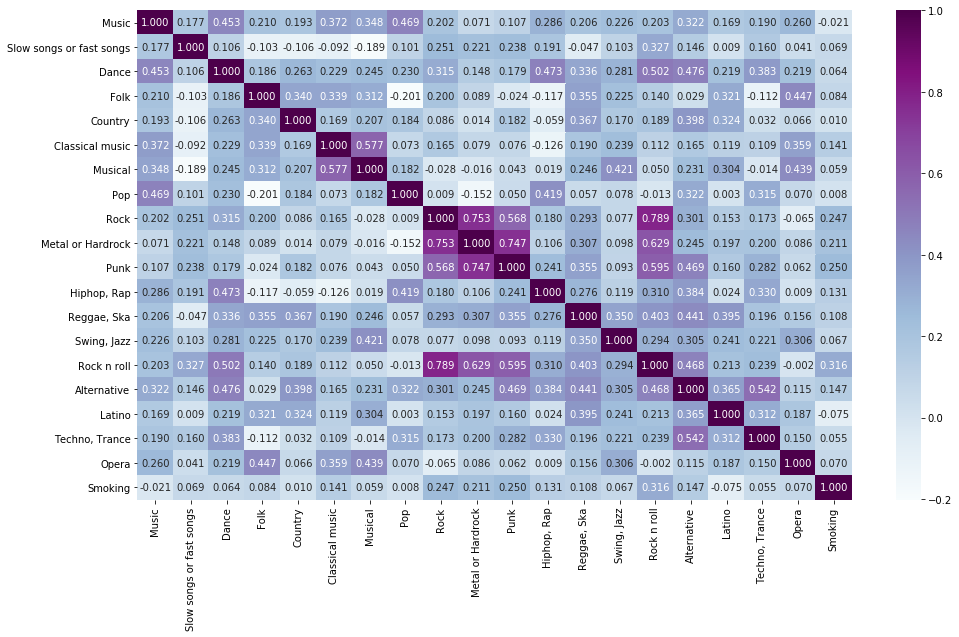

In [6]:
# Melihat correlation matrix dari dataset kita
plt.figure(figsize=(16,9))
sns.heatmap(featPred.corr(method='pearson'), annot=True, fmt='.3f', cmap='BuPu')

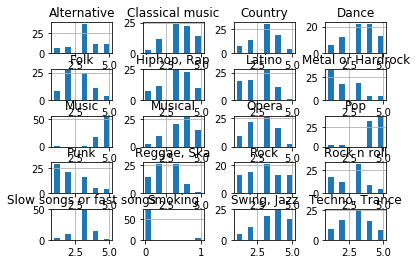

In [7]:
featPred.hist()
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.rcParams["figure.figsize"] = [160,90]
plt.show()

In [8]:
# Pisahkan feature dari target
X = featPred[["Music","Slow songs or fast songs","Dance","Folk","Country","Classical music","Musical","Pop","Rock","Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz","Rock n roll","Alternative","Latino","Techno, Trance","Opera"]].values
y = featPred[["Smoking"]].values

In [9]:
# Split menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Buat model KNN dengan 35 neighbor untuk data Slovakia dan 5 neighbor untuk data Indonesia
# (sesuai dengan rekomendasi best k di bagian bawah nanti)
classifier = KNeighborsClassifier(n_neighbors=35)

# Train modelnya
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [11]:
# Lihat confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(14, 0, 1, 0)

In [12]:
# Hitung akurasi

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 93.33 %.


In [13]:
# Mencari k terbaik

# Membuat list pilihan k untuk KNN
k_list = list(range(1,50,2))

cv_scores = []

# Melakukan cross validation 10-fold
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y h

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y

<Figure size 11520x6480 with 0 Axes>

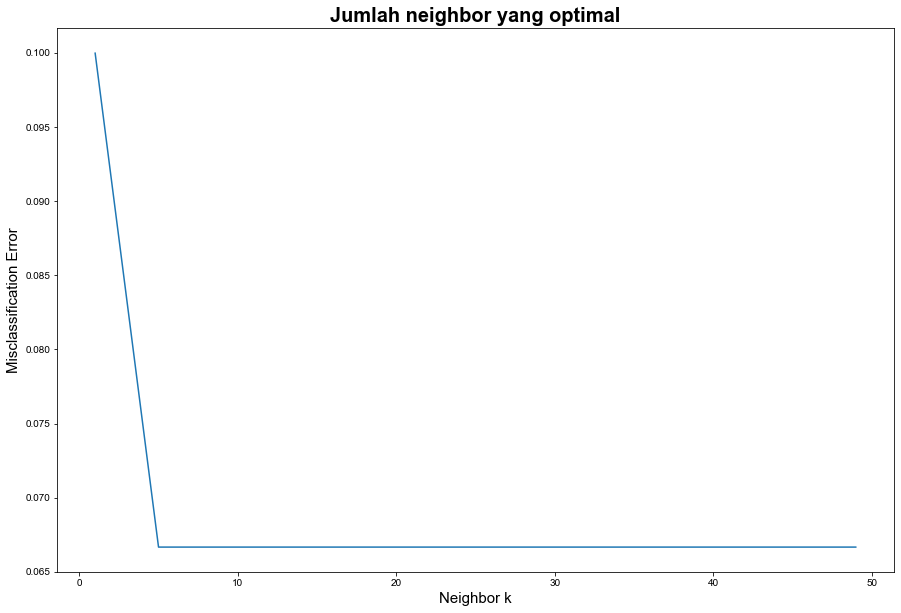

In [14]:
# Ubah menjadi Misclassification Error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Jumlah neighbor yang optimal', fontsize=20, fontweight='bold')
plt.xlabel('Neighbor k', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [15]:
# Dari hasil tersebut dapat diketahui k terbaik:
# Slovakia = 35
# Indonesia = 5
best_k = k_list[MSE.index(min(MSE))]
print("Jumlah optimal untuk neighbor k adalah %d." % best_k)

Jumlah optimal untuk neighbor k adalah 5.


In [16]:
# Print Precision, Recall, F1 score, dan Support
precision_recall_fscore_support(y_test, y_pred, average='macro')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.4666666666666667, 0.5, 0.4827586206896552, None)